In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql

### Handle Missing Data 

In [62]:
playstore = pd.read_csv('http://bit.ly/dwp-data-playstore')

In [63]:
df_playstore = playstore

In [66]:
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
df_playstore[pd.isnull(df_playstore['Rating'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


1. Fill with constant value

    fill with mean, median, or mode

In [11]:
median_rating = df_playstore['Rating'].median()
median_rating

4.3

In [13]:
mean_rating = df_playstore['Rating'].mean()
mean_rating

4.2078406051102295

In [15]:
mode_rating = df_playstore['Rating'].mode()
mode_rating

0    4.3
dtype: float64

In [10]:
df_playstore['Rating']=df_playstore['Rating'].fillna(median_rating)

2. Fill with dynamic value

In [ ]:
# objective mengisi null values di rating ndegan nilai rata2 rating pada kategori apps tersebut

# step 1 --> cari rata-rata rating di setiap category (aggregasi data - GROUPBY)

# step 2 --> isi null values berdasarkan nilai rata2 rating pada category tersebut
#            (manupulate dataframe -> define function - apply function)

In [51]:
rat_by_cat = df_playstore.groupby('Category')['Rating'].median()
rat_by_cat

Category
1.9                    19.0
ART_AND_DESIGN          4.4
AUTO_AND_VEHICLES       4.3
BEAUTY                  4.3
BOOKS_AND_REFERENCE     4.5
BUSINESS                4.3
COMICS                  4.4
COMMUNICATION           4.3
DATING                  4.1
EDUCATION               4.4
ENTERTAINMENT           4.2
EVENTS                  4.5
FAMILY                  4.3
FINANCE                 4.3
FOOD_AND_DRINK          4.3
GAME                    4.4
HEALTH_AND_FITNESS      4.5
HOUSE_AND_HOME          4.3
LIBRARIES_AND_DEMO      4.2
LIFESTYLE               4.2
MAPS_AND_NAVIGATION     4.2
MEDICAL                 4.3
NEWS_AND_MAGAZINES      4.2
PARENTING               4.4
PERSONALIZATION         4.4
PHOTOGRAPHY             4.3
PRODUCTIVITY            4.3
SHOPPING                4.3
SOCIAL                  4.3
SPORTS                  4.3
TOOLS                   4.2
TRAVEL_AND_LOCAL        4.3
VIDEO_PLAYERS           4.2
WEATHER                 4.3
Name: Rating, dtype: float64

In [67]:
def rating_category(row):
    if pd.isnull(row['Rating']):
        return rat_by_cat[row['Category']]
    return row['Rating']

# 2. Apply functionnya
df_playstore['Rating'] = df_playstore.apply(rating_category, axis=1)

In [69]:
df_playstore.loc[23,:]

App                        Mcqueen Coloring pages
Category                           ART_AND_DESIGN
Rating                                        4.4
Reviews                                        61
Size                                         7.0M
Installs                                 100,000+
Type                                         Free
Price                                           0
Content Rating                           Everyone
Genres            Art & Design;Action & Adventure
Last Updated                        March 7, 2018
Current Ver                                 1.0.0
Android Ver                            4.1 and up
Name: 23, dtype: object

## Neural Network

machine learning - deep learning

In [71]:
import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
car = pd.read_csv('http://bit.ly/dwp-data-car')

In [74]:
df_car = car

In [77]:
df_car

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,MPG
0,8,307,130,3504,12,70,1,18
1,8,350,165,3693,11,70,1,15
2,8,318,150,3436,11,70,1,18
3,8,304,150,3433,12,70,1,16
4,8,302,140,3449,10,70,1,17
...,...,...,...,...,...,...,...,...
387,4,140,86,2790,15,82,1,27
388,4,97,52,2130,24,82,2,44
389,4,135,84,2295,11,82,1,32
390,4,120,79,2625,18,82,1,28


In [76]:
df_car['Origin'].unique()

array([1, 3, 2], dtype=int64)

### Neural Network for Regression

In [122]:
#define x / parameter & y / target 
x = df_car.drop(columns='MPG')
y = df_car['MPG']

In [123]:
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [124]:
#Stardardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [125]:
#initiate the model (neural network)
## Neural Network in Tensorflow
model = Sequential()

In [126]:
## Add Hidden Layer
model.add(Dense(8, input_dim = x_train.shape[1], activation='relu'))

In [127]:
## Add Output Layer
model.add(Dense(1,activation='relu'))

In [128]:
# Compile Model
model.compile(loss= 'mae', optimizer=Adam(lr=0.05))

In [129]:
#training process - Testing process - evaluation
history = model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=100,
          validation_data=(x_test,y_test))

Epoch 1/100
5/5 [==============================] - 0s 27ms/step - loss: 21.7785 - val_loss: 20.1614
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 18.4379 - val_loss: 15.7450
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 13.4288 - val_loss: 9.9818
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 8.5150 - val_loss: 8.4953
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 7.4711 - val_loss: 9.0583
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 7.4248 - val_loss: 8.1126
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 5.9190 - val_loss: 5.8731
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 4.5751 - val_loss: 4.2102
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 4.1376 - val_loss: 3.3039
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 3.8632 - val_loss: 3.3481
Epoch 11/100
5/5 [=====

5/5 [==============================] - 0s 5ms/step - loss: 1.7683 - val_loss: 1.8721
Epoch 85/100
5/5 [==============================] - 0s 6ms/step - loss: 1.7729 - val_loss: 1.9602
Epoch 86/100
5/5 [==============================] - 0s 5ms/step - loss: 1.7827 - val_loss: 1.9523
Epoch 87/100
5/5 [==============================] - 0s 5ms/step - loss: 1.7746 - val_loss: 1.9344
Epoch 88/100
5/5 [==============================] - 0s 5ms/step - loss: 1.7519 - val_loss: 1.9499
Epoch 89/100
5/5 [==============================] - 0s 5ms/step - loss: 1.7139 - val_loss: 1.9486
Epoch 90/100
5/5 [==============================] - 0s 5ms/step - loss: 1.7364 - val_loss: 1.9904
Epoch 91/100
5/5 [==============================] - 0s 5ms/step - loss: 1.7128 - val_loss: 1.8861
Epoch 92/100
5/5 [==============================] - 0s 6ms/step - loss: 1.7419 - val_loss: 1.9747
Epoch 93/100
5/5 [==============================] - 0s 6ms/step - loss: 1.7373 - val_loss: 1.9586
Epoch 94/100
5/5 [===============

In [133]:
history

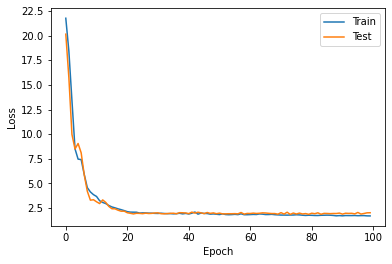

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])

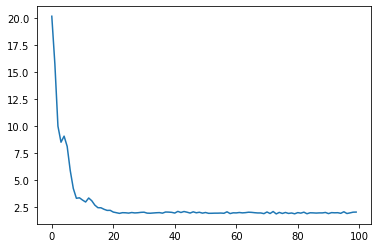

In [132]:
plt.plot(history.history['val_loss'])